<a href="https://colab.research.google.com/github/fatihadr/UAS-NLP_Text-Classification/blob/main/UAS_NLP_Modelling_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT UAS MATA KULIAH NATURAL LANGUAGE PROCESSING (NLP)**




*   Della Agustin (2215061116)
*   Syefara Raissa Ramdhan (2215061012)
*   Siti Fatiha Diza Rahman (2215061084)

**Link Streamlit:** https://text-classification-skripsi.streamlit.app/

*   Preprocessing : https://colab.research.google.com/drive/1-j50pbyVKeWOt4ZhQYlN3508_HAup7AW?usp=sharing
*   Modelling & Testing : https://colab.research.google.com/drive/1XHilCyYVt_vj5oAMTkXpGo2hAbeFtuTN?usp=sharing
*   (Resampling) Modelling & Testing : https://colab.research.google.com/drive/127mIg5wyjM8TsgefaVQ46Y3H3CogIx5l?usp=sharing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install Sastrawi

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# **Load Data**


In [ ]:
# Load CSV
gabung_df = pd.read_csv("/content/drive/MyDrive/hasil_preprocessing.csv")
gabung_df


,eprintid,title,subjects,label
0,8282,peran gabunga kelompok tani gapoktan bakti mak...,630,600
1,11260,analys quality control product at limited part...,300,300
2,11260,analys quality control product at limited part...,350,300
3,11261,the role of interpersonal communication in the...,300,300
4,11261,the role of interpersonal communication in the...,302,300
...,...,...,...,...
33731,87739,kembang media video transkrip super franais ba...,440,400
33732,87740,guna media autentik majalah vogue france untuk...,300,300
33733,87740,guna media autentik majalah vogue france untuk...,370,300
33734,87741,analisis layak usaha produk telur asin ayam la...,630,600


In [ ]:
# cari yang null
gabung_df.isnull().sum()

,0
eprintid,0
title,1
subjects,0
label,0


In [ ]:
# hapus title yang null
gabung_df.dropna(subset=['title'], inplace=True)
gabung_df.isnull().sum()

,0
eprintid,0
title,0
subjects,0
label,0


# **Modelling**

Dilakukan perbandingan hasil evaluasi dari beberapa model, kemudian dipilih model dengan tingkat akurasi tertinggi sebagai model terbaik untuk digunakan.

In [ ]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)
X = vectorizer.fit_transform(gabung_df['title'])  # Pastikan sudah bersih
y = gabung_df['label']

# Encode labels (agar semua model bisa pakai label numerik)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Daftar model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Training & Evaluation
for name, model in models.items():
    print(f"\n==============================")
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0, target_names=[str(c) for c in le.classes_]))


Model: Logistic Regression
Akurasi: 0.7510004446420632
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.30      0.41       474
         100       0.00      0.00      0.00        34
         200       0.00      0.00      0.00         5
         300       0.79      0.91      0.85      3194
         400       0.54      0.45      0.49       199
         500       0.71      0.61      0.66      1001
         600       0.72      0.79      0.75      1633
         700       0.36      0.07      0.11       119
         800       0.00      0.00      0.00         4
         900       0.33      0.02      0.04        84

    accuracy                           0.75      6747
   macro avg       0.41      0.32      0.33      6747
weighted avg       0.73      0.75      0.73      6747


Model: Naive Bayes
Akurasi: 0.7469986660738106
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.28   

**Menyimpan Model Terbaik**

# **LOGISTIC REGRESSION**

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

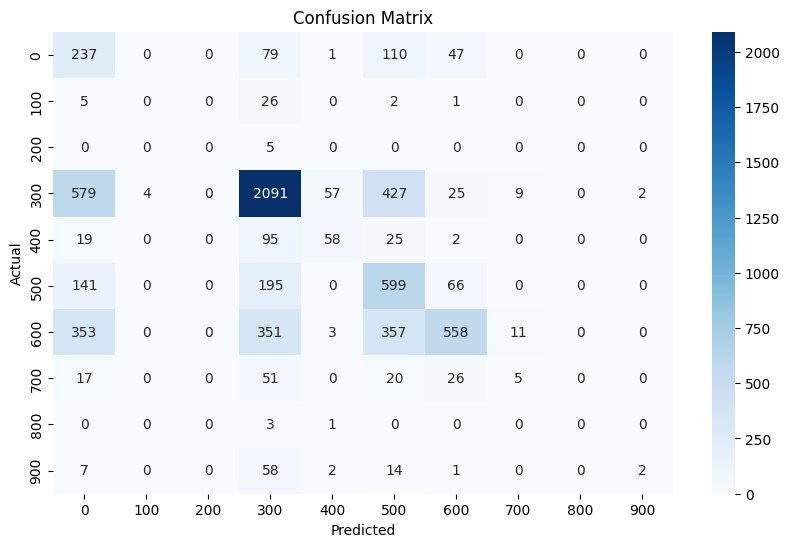

In [ ]:
# Confusion Matrix (opsional, jika ingin melihat distribusi prediksi)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **TESTING 1**

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return stemmer.stem(text)

def prediksi_judul1(judul_baru):
    judul_bersih = clean_text(judul_baru)
    judul_vector = vectorizer.transform([judul_bersih])
    pred_encoded = model.predict(judul_vector.toarray())[0]
    pred_label = le.inverse_transform([pred_encoded])[0]
    return pred_label

In [ ]:
while True:
    judul_input = input("Masukkan judul skripsi (atau ketik 'exit' untuk keluar): ")
    if judul_input.lower() == 'exit':
        break

    hasil =  prediksi_judul1(judul_input)
    print(f"Prediksi kelas untuk judul tersebut adalah: {hasil}")
    print("="*50)

Masukkan judul skripsi (atau ketik 'exit' untuk keluar): PENGARUH RPM DAN JUMLAH MASUKAN BATANG SINGKONG TERHADAP KINERJA MESIN RABAKONG TIPE TEP-6
Prediksi kelas untuk judul tersebut adalah: 600
Masukkan judul skripsi (atau ketik 'exit' untuk keluar): PENGGUNAAN LAYANAN BIMBINGAN KELOMPOK TEKNIK DISKUSI UNTUK MENINGKATKAN SELF CONTROL SISWA KELAS X DI SMK SWADHIPA 2 NATAR TAHUN AJARAN 2023/2024
Prediksi kelas untuk judul tersebut adalah: 300
Masukkan judul skripsi (atau ketik 'exit' untuk keluar): MANAJEMEN PENDIDIKAN DI SEMINARI MENENGAH SANTO PAULUS PALEMBANG
Prediksi kelas untuk judul tersebut adalah: 300
Masukkan judul skripsi (atau ketik 'exit' untuk keluar): Strategi Komunikasi Persuasif Agen Asuransi Dalam Upaya Rekrutmen Agen Baru (Studi Pada Agen Asuransi PT Prudential Life Assurance Bandar Lampung)
Prediksi kelas untuk judul tersebut adalah: 300
Masukkan judul skripsi (atau ketik 'exit' untuk keluar): TINDAK TUTUR EKSPRESIF DALAM NOVEL RANKING 1 KARYA SARA TEE DAN IMPLIKASIN

**(menambahkan class_weigth=balanced)**

In [ ]:
# Simpan model terbaik
model2 = LogisticRegression(max_iter=1000, class_weight='balanced')
model2.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

=== Evaluasi Model Logistic Regression ===

Akurasi: 0.6971987550022232

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.53      0.49       474
         100       0.13      0.59      0.21        34
         200       0.00      0.00      0.00         5
         300       0.91      0.72      0.81      3194
         400       0.53      0.93      0.67       199
         500       0.64      0.73      0.68      1001
         600       0.75      0.64      0.69      1633
         700       0.28      0.72      0.40       119
         800       0.23      0.75      0.35         4
         900       0.24      0.81      0.37        84

    accuracy                           0.70      6747
   macro avg       0.42      0.64      0.47      6747
weighted avg       0.77      0.70      0.72      6747

F1 Score (Macro): 0.46844355587767383


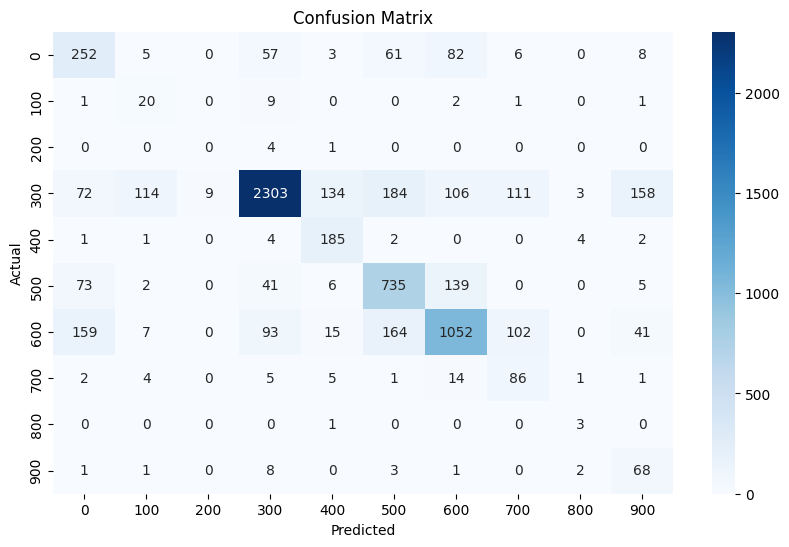

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

# Prediksi pada data uji
y_pred = model2.predict(X_test)

# Evaluasi
print("=== Evaluasi Model Logistic Regression ===\n")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0, target_names=[str(cls) for cls in le.classes_]))

# F1-score macro (untuk semua kelas secara rata)
f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix (opsional, jika ingin melihat distribusi prediksi)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **TESTING 2 (setelah menambahkan class_weigth=balanced)**

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return stemmer.stem(text)

def prediksi_judul2(judul_baru):
    judul_bersih = clean_text(judul_baru)
    judul_vector = vectorizer.transform([judul_bersih])
    pred_encoded = model2.predict(judul_vector.toarray())[0]
    pred_label = le.inverse_transform([pred_encoded])[0]
    return pred_label

In [ ]:
while True:
    judul_input = input("Masukkan judul skripsi (atau ketik 'exit' untuk keluar): ")
    if judul_input.lower() == 'exit':
        break

    hasil =  prediksi_judul2(judul_input)
    print(f"Prediksi kelas untuk judul tersebut adalah: {hasil}")
    print("="*50)

Masukkan judul skripsi (atau ketik 'exit' untuk keluar): PENGARUH RPM DAN JUMLAH MASUKAN BATANG SINGKONG TERHADAP KINERJA MESIN RABAKONG TIPE TEP-6
Prediksi kelas untuk judul tersebut adalah: 0
Masukkan judul skripsi (atau ketik 'exit' untuk keluar): PENGGUNAAN LAYANAN BIMBINGAN KELOMPOK TEKNIK DISKUSI UNTUK MENINGKATKAN SELF CONTROL SISWA KELAS X DI SMK SWADHIPA 2 NATAR TAHUN AJARAN 2023/2024
Prediksi kelas untuk judul tersebut adalah: 100
Masukkan judul skripsi (atau ketik 'exit' untuk keluar): MANAJEMEN PENDIDIKAN DI SEMINARI MENENGAH SANTO PAULUS PALEMBANG
Prediksi kelas untuk judul tersebut adalah: 200
Masukkan judul skripsi (atau ketik 'exit' untuk keluar): Strategi Komunikasi Persuasif Agen Asuransi Dalam Upaya Rekrutmen Agen Baru (Studi Pada Agen Asuransi PT Prudential Life Assurance Bandar Lampung)
Prediksi kelas untuk judul tersebut adalah: 300
Masukkan judul skripsi (atau ketik 'exit' untuk keluar): TINDAK TUTUR EKSPRESIF DALAM NOVEL RANKING 1 KARYA SARA TEE DAN IMPLIKASINYA

Evaluasi telah dilakukan terhadap dua model Logistic Regression, yaitu: (1) model tanpa penanganan khusus terhadap ketidakseimbangan data (menggunakan data apa adanya), dan (2) model dengan penyesuaian class_weight='balanced' untuk mengatasi distribusi kelas yang tidak seimbang. Hasil evaluasi menunjukkan bahwa model pertama memang menghasilkan total F1-score yang lebih tinggi, namun prediksinya cenderung bias terhadap kelas mayoritas. Sebaliknya, model kedua menghasilkan total F1-score yang sedikit lebih rendah, tetapi nilai rata-rata makro (macro average) meningkat, menandakan bahwa model tersebut mampu memberikan prediksi yang lebih seimbang terhadap semua kelas.

Meskipun model kedua menunjukkan perbaikan dalam distribusi prediksi, kami masih merasa bahwa akurasi model secara keseluruhan dapat ditingkatkan. Oleh karena itu, kami mencoba pendekatan lain, yaitu dengan menerapkan teknik resampling menggunakan SMOTE (Synthetic Minority Over-sampling Technique). SMOTE bekerja dengan cara membuat data sintetis untuk kelas minoritas berdasarkan kedekatan antar data yang ada, bukan hanya sekadar menduplikat data. Dengan demikian, model akan mendapatkan representasi kelas minoritas yang lebih baik selama proses pelatihan. Tujuan penggunaan SMOTE ini adalah untuk memperbaiki performa model dalam mengklasifikasikan kelas minoritas, sekaligus meningkatkan skor evaluasi secara keseluruhan, baik dari sisi akurasi maupun keseimbangan antar kelas, berikut ini linknya: https://colab.research.google.com/drive/127mIg5wyjM8TsgefaVQ46Y3H3CogIx5l?usp=sharing  